# Accuracy of Humi Gadget in 3D printed Housing

The Humi Gagdet in the housing was placed on a wooden table inside the Thunder at different temperatures and humidities to test the accuracy of the sensor and if there is any self heating. Additionally two SHTs were placed on both sides of the Humi Gadget as well as the Dew Point mirror in general to measure the ambient temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean
#from quickplot import QuickPlot

import sensirion_fastedf as fastedf
import datetime
import data_access as da
import csv
import math
from scipy.optimize import curve_fit

In [2]:
amb1 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/2022-09-27_09-12-55-SHT4x_256963899.edf')
amb2 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/2022-09-27_09-12-55-SHT4x_256968205.edf')
DM20 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/20220927T071313Z_dmei_ThunderMeasurement_HumiG_n/20220927T071336Z_dmei_ThunderMeasurement_HumiG_nT20C/20220927T071336Z_DPM373_DewPointMirror.edf')
DM25 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/20220927T071313Z_dmei_ThunderMeasurement_HumiG_n/20220927T191911Z_dmei_ThunderMeasurement_HumiG_nT25C/20220927T191911Z_DPM373_DewPointMirror.edf')
DM30 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/20220927T071313Z_dmei_ThunderMeasurement_HumiG_n/20220928T072446Z_dmei_ThunderMeasurement_HumiG_nT30C/20220928T072446Z_DPM373_DewPointMirror.edf')

HumiGadget = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/Thunder_3_long/Sensirion-MyAmbience-2022-09-29T08-38-47.637709/Sensirion_MyAmbience_SHT40_Gadget_9D56_2022-09-29T08-38-47.638228.edf')
# amb1.head()

# HumiGadget.RH.plot()
# print(HumiGadget)

start = datetime.datetime(2022,9,27,7,13).timestamp() # from amb1 starting measurement
# print(start)

HumiGadget.Epoch_UTC = HumiGadget.Epoch_UTC - start
amb1.Epoch_UTC = amb1.Epoch_UTC - start
amb2.Epoch_UTC = amb2.Epoch_UTC - start
DM20.Epoch_UTC = DM20.Epoch_UTC - start
DM25.Epoch_UTC = DM25.Epoch_UTC - start
DM30.Epoch_UTC = DM30.Epoch_UTC - start
# print(HumiGadget)
HumiGadget = HumiGadget.where(HumiGadget.Epoch_UTC > 0).dropna()
amb1 = amb1.where(amb1.Epoch_UTC > 0).dropna()
amb2 = amb2.where(amb2.Epoch_UTC > 0).dropna()
DM20 = DM20.where(DM20.Epoch_UTC > 0).dropna()
DM25 = DM25.where(DM25.Epoch_UTC > 0).dropna()
DM30 = DM30.where(DM30.Epoch_UTC > 0).dropna()
HumiGadget.head()
# DM20.RH_DewPointMirror.plot()
# DM20.T_DewPointMirror.plot()
# HumiGadget.RH.plot()

DM = list()
DM.append(DM20)
DM.append(DM25)
DM.append(DM30)

print(amb1.size)
print(HumiGadget.size)

1363788
68208


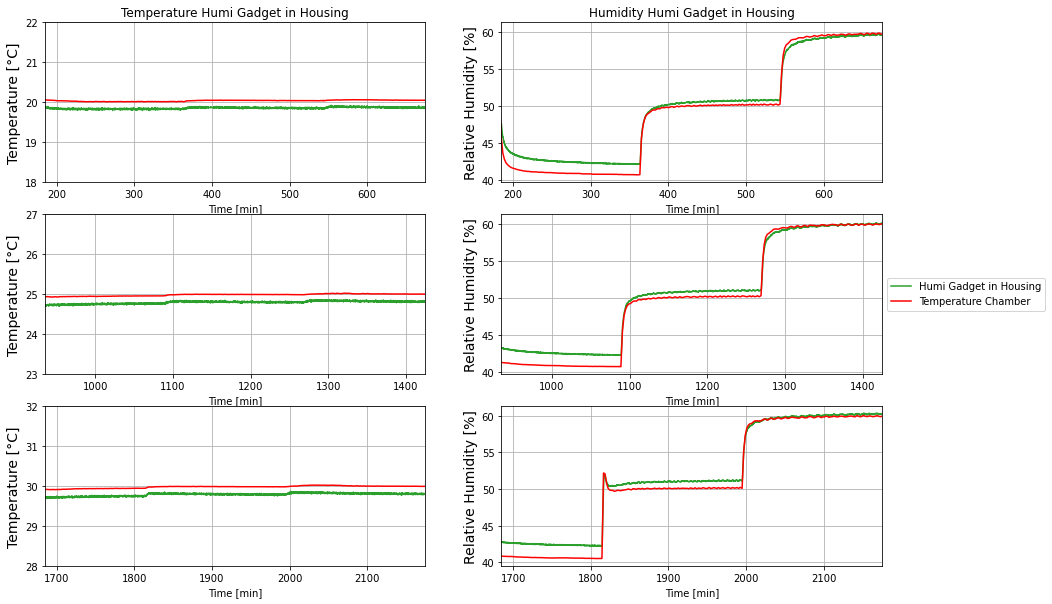

In [12]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

ax = axes[0,0]
ax.set_title('Temperature Humi Gadget in Housing')
# ax.set_ylim(24,26)

ax = axes[0,1]
ax.set_title('Humidity Humi Gadget in Housing')
# ax.set_ylim(50,55.5)

for i in range(0,3):
    start = 185 + 750*i
    temp = 18+5*i
    ax = axes[i,0]
    ax.set_ylabel('Temperature [°C]', fontsize = 14)
    ax.plot(HumiGadget.Epoch_UTC/60, HumiGadget['T'], color='tab:green', label='Humi Gadget in Housing')
    # ax.plot(amb1.Epoch_UTC/60, amb1.T_SHT4x_256963899, color='gold', label='SHT 85')
    # ax.plot(amb2.Epoch_UTC/60, amb2.T_SHT4x_256968205, color='blue', label='SHT 85')
    ax.plot(DM[i].Epoch_UTC/60, DM[i].T_DewPointMirror, color='red', label='Temperature Chamber')
    ax.set_xlim(start,start + 490)
    ax.set_ylim(temp, temp + 4)
    
    ax = axes[i,1]
    ax.set_ylabel('Relative Humidity [%]', fontsize=14)
    ax.plot(HumiGadget.Epoch_UTC/60, HumiGadget.RH, color='tab:green', label='Humi Gadget in Housing')
    # ax.plot(amb1.Epoch_UTC/60, amb1.RH_SHT4x_256963899, color='gold', label='SHT 85')
    # ax.plot(amb2.Epoch_UTC/60, amb2.RH_SHT4x_256968205, color='blue', label='SHT 85')
    ax.plot(DM[i].Epoch_UTC/60, DM[i].RH_DewPointMirror, color='red', label='Temperature Chamber')
    ax.set_xlim(start,start + 490)
    if i ==1:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
for ax in axes.flat:
    ax.grid()
    ax.set(xlabel = 'Time [min]')
    
#     ax.legend(loc='upper center')
#     ax.tick_params(labelsize=12)
#     ax.grid()
# plt.savefig('Accuracy.png', bbox_inches='tight')

For each temperature of 20, 25 and 30°C the humidity changed from 40 to 50 and then to 60% RH in the thunder. As can already be seen from the plot above is that the temperature accuracy is very good as all the sensors lie within less than 0.3°C of deviance to each other. As for the humidity, the Dew Point Mirror and the Humi Gadget have a very similar value as for the SHT 85 have a slightly higher value. This is most probably due to the fact, that the inlet and outlet stream of the humidity was set near to the Humi Gadget. Thus, it was in the direct stream where the Dew Point Mirror measured the same value and the SHTs were on the right and left and hence leading to an offset from the Dew Point Mirror. There might even be the possibility that the humidity sensors to measure the ambient are *contaminated* since they were not stored correctly.

### Error Analysis

Dew Point Mirror Mean and std:

In [4]:
# RH mean and std for each
RH20 = list()
RH25 = list()
RH30 = list()
start = 250*60
for i in range(0,3): # different temperatures
    if not i == 0:
        start = start + 180*60
    for j in range(0,3): # different humidities
        RH = DM[i].where(DM[i].Epoch_UTC > start).dropna()
        RH = RH.where(RH.Epoch_UTC < start + 110*60).dropna()
        # print(np.mean(RH.RH_DewPointMirror))
        # print(np.std(RH.RH_DewPointMirror))
        if i == 0:
            RH20.append(RH)
        elif i == 1:
            RH25.append(RH)
        else:
            RH30.append(RH)
        start = start + 180*60
# print(RH25)
        
# Temperature mean and std for each
Temp = list()
start = 250*60
for i in range(0,3): # different temperatures
    T = DM[i].where(DM[i].Epoch_UTC > start).dropna()
    T = T.where(T.Epoch_UTC < start + 400*60).dropna()
    # print(np.mean(T.T_DewPointMirror))
    # print(np.std(T.T_DewPointMirror))
    Temp.append(T)
    start = start + 750*60

Humi Gadget error and std in comparison to Dew Point Mirror:

In [5]:
Humi_RH20 = list()
Humi_RH25 = list()
Humi_RH30 = list()
start = 250*60
for i in range(0,3): # different temperatures
    if not i == 0:
        start = start + 180*60
    for j in range(0,3): # different humidities
        RH = HumiGadget.where(HumiGadget.Epoch_UTC > start).dropna()
        RH = RH.where(RH.Epoch_UTC < start + 110*60).dropna()
        # print(np.mean(RH.RH_DewPointMirror))
        # print(np.std(RH.RH_DewPointMirror))
        if i == 0:
            RH = RH.RH - mean(RH20[j].RH_DewPointMirror)
            std = np.std(RH)
            Humi_RH20.append([RH, std])
        elif i == 1:
            RH = RH.RH - mean(RH25[j].RH_DewPointMirror)
            std = np.std(RH)
            Humi_RH25.append([RH, std])
        else:
            RH = RH.RH - mean(RH30[j].RH_DewPointMirror)
            std = np.std(RH)
            Humi_RH30.append([RH, std])
        start = start + 180*60
# print(Humi_RH30)
        
# Temperature mean and std for each
Humi_Temp = list()
start = 250*60
for i in range(0,3): # different temperatures
    T = HumiGadget.where(HumiGadget.Epoch_UTC > start).dropna()
    T = T.where(T.Epoch_UTC < start + 400*60).dropna()
    T = T['T'] - mean(Temp[i].T_DewPointMirror)
    std = np.std(T)
    # print(np.mean(T.T_DewPointMirror))
    # print(np.std(T.T_DewPointMirror))
    Humi_Temp.append([T, std])
    start = start + 750*60
# print(Humi_Temp[0][1])

Humi_RH= list()
Humi_RH.append(Humi_RH30)
Humi_RH.append(Humi_RH25)
Humi_RH.append(Humi_RH20)
print(Humi_RH[1][1][1])

0.08601923413373887


Temperature Error and Standard Deviation:
0.0217699898775549
0.02780212376667471
0.0293812897255635
-0.18158843948314013


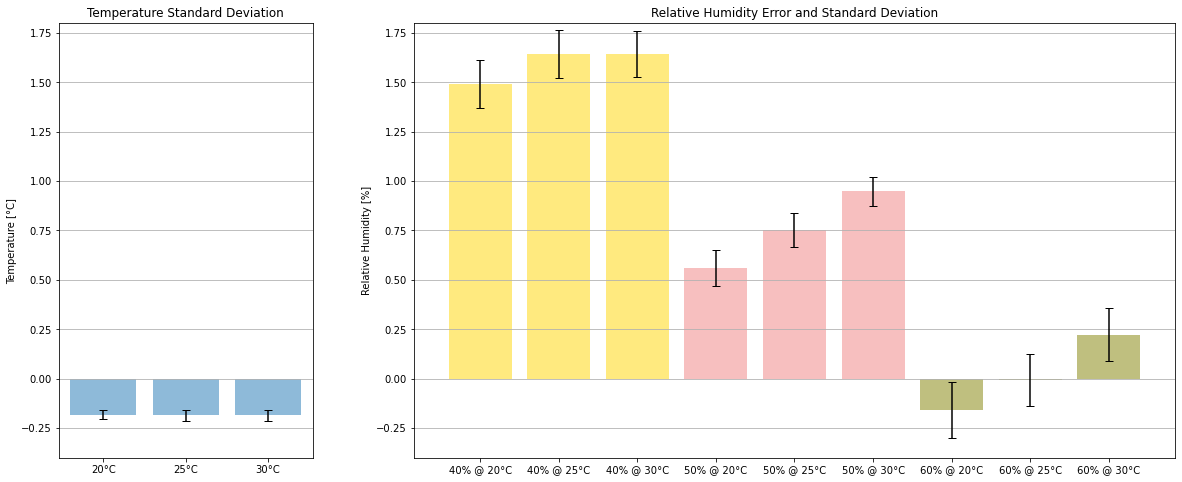

In [6]:
fig, axes = plt.subplots(1,2, figsize=(20,8), gridspec_kw={'width_ratios': [1, 3]})
colors = ['gold', 'gold', 'gold', 'lightcoral', 'lightcoral', 'lightcoral', 'olive', 'olive', 'olive']

ax = axes[0]
ax.set_title('Temperature Standard Deviation')
ax.bar(x=np.arange(3), #x-coordinates of bars
       height= [mean(Humi_Temp[0][0]), mean(Humi_Temp[1][0]), mean(Humi_Temp[2][0])], #height of bars
       yerr= [Humi_Temp[0][1],Humi_Temp[1][1],Humi_Temp[2][1]], #error bar width
       capsize=4, align = 'center', alpha = 0.5) #length of error bar caps
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['20°C','25°C','30°C'])
ax.set_ylabel('Temperature [°C]')
ax.set_ylim(-0.4,1.8)

print('Temperature Error and Standard Deviation:')
temperature = [20, 25, 30]
for i in range(0,3):
    print(Humi_Temp[i][1])

ax = axes[1]
ax.set_title('Relative Humidity Error and Standard Deviation')
ax.bar(x=np.arange(9), #x-coordinates of bars
       height= [mean(Humi_RH20[0][0]), mean(Humi_RH25[0][0]), mean(Humi_RH25[0][0]),
                   mean(Humi_RH20[1][0]), mean(Humi_RH25[1][0]), mean(Humi_RH30[1][0]),
                       mean(Humi_RH20[2][0]), mean(Humi_RH25[2][0]), mean(Humi_RH30[2][0])], #height of bars
       yerr= [Humi_RH20[0][1], Humi_RH25[0][1], Humi_RH30[0][1],
                  Humi_RH20[1][1], Humi_RH25[1][1], Humi_RH30[1][1],
                      Humi_RH20[2][1], Humi_RH25[2][1], Humi_RH30[2][1]], #error bar width
       capsize=4, alpha = 0.5, color = colors) #length of error bar caps
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['40% @ 20°C','40% @ 25°C','40% @ 30°C', '50% @ 20°C','50% @ 25°C','50% @ 30°C', '60% @ 20°C','60% @ 25°C','60% @ 30°C'])
ax.set_ylabel('Relative Humidity [%]')
ax.set_ylim(-0.4,1.8)

for ax in axes.flat:
    ax.yaxis.grid(True)

print(mean(Humi_Temp[0][0]))
# print('Humidity Standard Deviation 40% RH:')
# for j in range(0,3):
#     for i in range(0,3):
#         print(Humi_RH20[i][j][1])

As can be seen the maximum difference in the humidity is around 1.5% which lies within the sensor specifications of +- 1.8% as listed in the data sheet of the SHT4x. In addition, the temperator error is at around 0.2°C offset which is again similar to the specifications in the data sheet of +- 0.2°C.

## Conclusion

As can be seen from the error plot above, the specifications of the SHT4x sensor are not compromised inside the 3D printed housing. Thus, the accuracy of the sensor measurement is still given and can be used for correct reading of the surrounding temperature and humidity.